**Q1. Problem Statement: DBSCAN Clustering**

Load  the "Mall_Customers.csv"dataset  into  a  DataFrame  to  perform  the followingtasks:

1.Find the correlation among the all the columns and drop the column/s with the least correlation

2.Encode the "Gender"column using get_dummies() function

3.Perform   Density-Based   Spatial   Clustering   of   Applications   with   Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

4.Print the size of each cluster and also the size of outliers' cluster

5.Using a scatter plot shows how annual income corresponds to the spending rates of customers


In [ ]:
pip install fuzzy-c-means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fcmeans import FCM
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


1.Find the correlation among the all the columns and drop the column/s with the leastcorrelation



In [ ]:
corr_mat=df.corr()
corr_mat

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


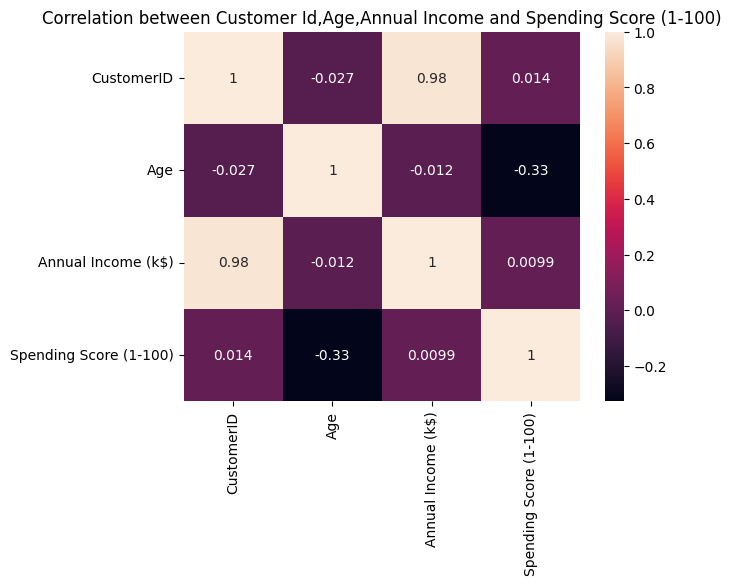

In [ ]:
import seaborn as sns
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation between Customer Id,Age,Annual Income and Spending Score (1-100)')
plt.show()

In [ ]:
df=df.drop(['CustomerID'],axis=1)


2.Encode the "Gender"column using get_dummies() function


In [ ]:
df=pd.get_dummies(df)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


3.Perform   Density-Based   Spatial   Clustering   of   Applications   with   Noise (DBSCAN) clustering with eps=12.5 and min_samples=4 and Print the size of each cluster and also the size of outliers' cluster

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db=DBSCAN(eps=12.5,min_samples=4).fit(df)
dbs=df.copy()
dbs.loc[:,'cluster']=db.labels_

In [ ]:
dbs

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,-1
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,-1
196,45,126,28,1,0,-1
197,32,126,74,0,1,-1
198,32,137,18,0,1,-1


In [ ]:
dbs_cluster_size=dbs.groupby('cluster').size().to_frame()
dbs_cluster_size.columns=['DBSCAN_Size']
dbs_cluster_size

,DBSCAN_Size
cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [ ]:
Outliers=dbs[dbs['cluster']==-1]
Outliers


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
2,20,16,6,1,0,-1
6,35,18,6,1,0,-1
7,23,18,94,1,0,-1
10,67,19,14,0,1,-1
11,35,19,99,1,0,-1
14,37,20,13,0,1,-1
19,35,23,98,1,0,-1
40,65,38,35,1,0,-1
158,34,78,1,0,1,-1
187,28,101,68,0,1,-1


5.Using a scatter plot shows how annual income corresponds to the spending rates of customers

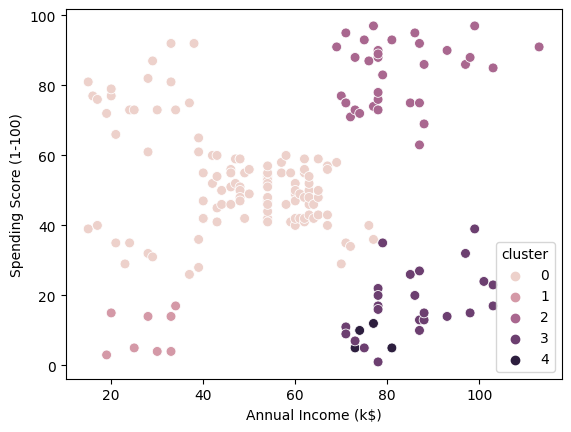

In [ ]:
sc=sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
                   data=dbs[dbs['cluster']!=-1],
                   legend='full', hue='cluster',s=50,cmap='viridis')

**Problem Statement: Fuzzy C Means Clustering**

Note:This problem is in continuation with the previous problem. With the same DataFrame as in the previous problem, perform tasks:

1.Convert the DataFrame into a NumPy array using the to_numpy()function

2.Perform the Fuzzy-C-Means clustering with cluster size –2

3.Plot  the  clustered data  using  a  scatter  plot  to  analyze,  How  the  Age  of  the customers corresponds to the spending rate

4.Predict    the    spending    capability    of    the    mall    customers    using    the fcm.predict()function

5.Using a scatter plot, predict which of the age groups/cluster will be having highest spending capabilityDataset

In [ ]:
arr=df.to_numpy()
arr

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

2.Perform the Fuzzy-C-Means clustering with cluster size –2

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(arr)

3.Plot the clustered data using a scatter plot to analyze, How the Age of the customers corresponds to the spending rate

Text(0.5, 1.0, 'Age  of  the customers corresponds to the spending rat')

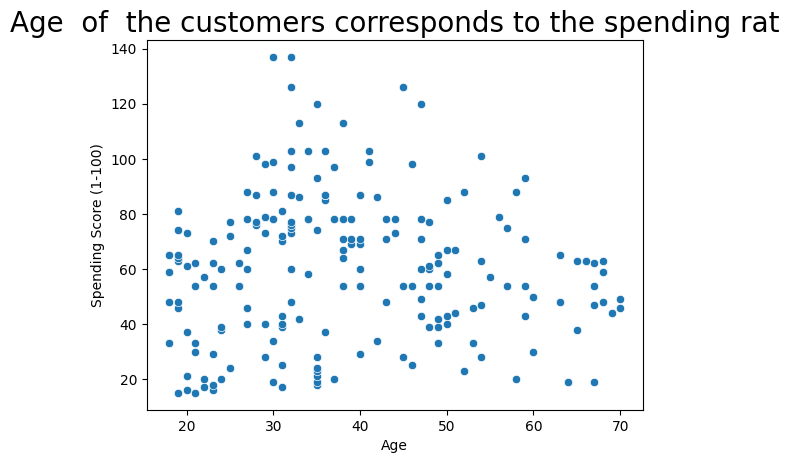

In [ ]:
xs=sns.scatterplot(x=arr[:,0], y=arr[:,1],cmap='k')

xs.set_xlabel('Age',fontsize=10),
xs.set_ylabel('Spending Score (1-100)',fontsize=10)
plt.title('Age  of  the customers corresponds to the spending rat',fontsize=20)

4.Predict    the    spending    capability    of    the    mall    customers    using    the fcm.predict()function

In [ ]:
fcm.predict(arr)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
fcm.centers

array([[32.95930001, 70.38881748, 68.0806127 ,  0.56259138,  0.43740862],
       [43.92198578, 54.10615315, 38.63980174,  0.57053613,  0.42946387]])

In [ ]:
fcm_labels=fcm.predict(arr)
fcm_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

5.Using a scatter plot, predict which of the age groups/cluster will be having highest spending capabilityDataset

Text(0.5, 1.0, 'Age  of  the customers corresponds to the spending rat')

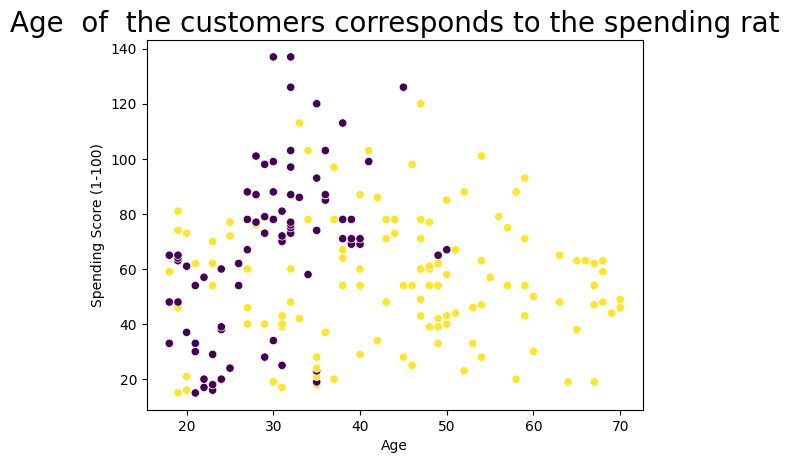

In [ ]:
xs=sns.scatterplot(x=arr[:,0], y=arr[:,1],c=fcm_labels)
xs.set_xlabel('Age',fontsize=10),
xs.set_ylabel('Spending Score (1-100)',fontsize=10)
plt.title('Age  of  the customers corresponds to the spending rat',fontsize=20)